In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df_train=pd.read_csv("train.csv", index_col="Id")
df_test=pd.read_csv("test.csv",index_col="Id")

In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
mis_col=[]
[mis_col.append(col) for col in df_train.columns if df_train[col].isnull().any()==True]
mis_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
mis_col_test=[]
[mis_col_test.append(col) for col in df_test.columns if df_test[col].isnull().any()==True]
mis_col_test

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

de lo anterior podemos observar que hay columnas que tienen valores faltantes en un dataset pero no en el otro, por lo que si queremos lidiar con todos los valores faltantes tenemos dos opciones  
    -Concatenar los dataframes, lidiar con los valores y luego volver a separarlos  
    -lidiar con cada dataset de manera independiente  
Es claro que el problema con el primer método es el data leaking que podría afectar el modelo  
para el segundo método la desventaja es el tiempo que tardariamos en lidiar con ambos datasets, pero lo mas probable es que nos decidamos por este enfoque
    

# Lidiando con el train set

In [7]:
df_train[mis_col].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
df_train[mis_col]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
Id,,,,,,,,,,,,,,,,,,,
1,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
2,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
3,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
4,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
5,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1457,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1458,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed


In [9]:
def get_object_columns(data):
    cols_obj=[]
    cols_num=[]
    for i in data.columns:
        if data[i].dtypes == object:
            cols_obj.append(i)
        else:
            cols_num.append(i)
    return cols_obj, cols_num

In [10]:
cols_obj, cols_num=get_object_columns(df_train)

## Empecemos con las columans categoricas

In [11]:
def limpieza_train(df_train):
    df_train['Alley'].fillna('None',inplace=True)
    df_train['MasVnrType'].fillna('None',inplace=True)
    bsmt=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
    [df_train[col].fillna('None',inplace=True) for col in bsmt]
    df_train['Electrical'].fillna(method='bfill',inplace=True)
    df_train['FireplaceQu'].fillna('None',inplace=True)
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        df_train[col] = df_train[col].fillna('None')
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        df_train[col] = df_train[col].fillna(0)
    df_train['PoolQC'].fillna('None',inplace=True)
    df_train['Fence'].fillna('None',inplace=True)
    df_train['MiscFeature'].fillna('None',inplace=True)
    med_front=df_train['LotFrontage'].median()
    df_train['LotFrontage'].fillna(med_front,inplace=True)
    df_train['MasVnrArea'].fillna(0,inplace=True)
    df_train.loc[df_train['MasVnrArea'].isin([288.0, 1.0, 344.0, 312.0]), 'MasVnrArea'] = 0

In [12]:
df_train['Alley'].fillna('None',inplace=True)

In [13]:
df_train['Alley'].unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

In [14]:
df_train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [15]:
df_train['MasVnrType'].fillna('None',inplace=True)

In [16]:
df_train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [17]:
bsmt=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [18]:
[print(df_train[col].unique()) for col in bsmt ]

['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


[None, None, None, None, None]

In [19]:
[df_train[col].fillna('None',inplace=True) for col in bsmt]

[None, None, None, None, None]

In [20]:
[print(df_train[col].isnull().sum()) for col in bsmt]

0
0
0
0
0


[None, None, None, None, None]

In [21]:
df_train.Electrical.isnull().sum()

1

In [22]:
df_train['Electrical'].fillna(method='bfill',inplace=True)

In [23]:
df_train.Electrical.isnull().sum()

0

In [24]:
df_train['FireplaceQu'].isnull().sum()

690

In [25]:
df_train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [26]:
df_train['Fireplaces'].unique()

array([0, 1, 2, 3], dtype=int64)

In [27]:
len(df_train[df_train['Fireplaces']==0])

690

In [28]:
df_train[['Fireplaces','FireplaceQu']].sort_values('Fireplaces',ascending=True)[:691]

,Fireplaces,FireplaceQu
Id,,
1,0,NaN
798,0,NaN
801,0,NaN
802,0,NaN
805,0,NaN
...,...,...
32,0,NaN
407,0,NaN
400,0,NaN


In [29]:
df_train['FireplaceQu'].fillna('None',inplace=True)

In [30]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df_train[col] = df_train[col].fillna('None')

In [31]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)


In [32]:
df_train['GarageYrBlt']=df_train['GarageYrBlt'].apply(str)

In [33]:
len(df_train[df_train['PoolArea']==0])

1453

In [34]:
df_train[['PoolArea','PoolQC']].sort_values('PoolArea',ascending=True)[:1454]

,PoolArea,PoolQC
Id,,
1,0,NaN
975,0,NaN
974,0,NaN
973,0,NaN
972,0,NaN
...,...,...
481,0,NaN
480,0,NaN
479,0,NaN


In [35]:
df_train['PoolQC'].fillna('None',inplace=True)

In [36]:
df_train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [37]:
df_train['Fence'].fillna('None',inplace=True)

In [38]:
df_train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [39]:
df_train['MiscFeature'].fillna('None',inplace=True)

## Ahora lidiamos con los features numericos

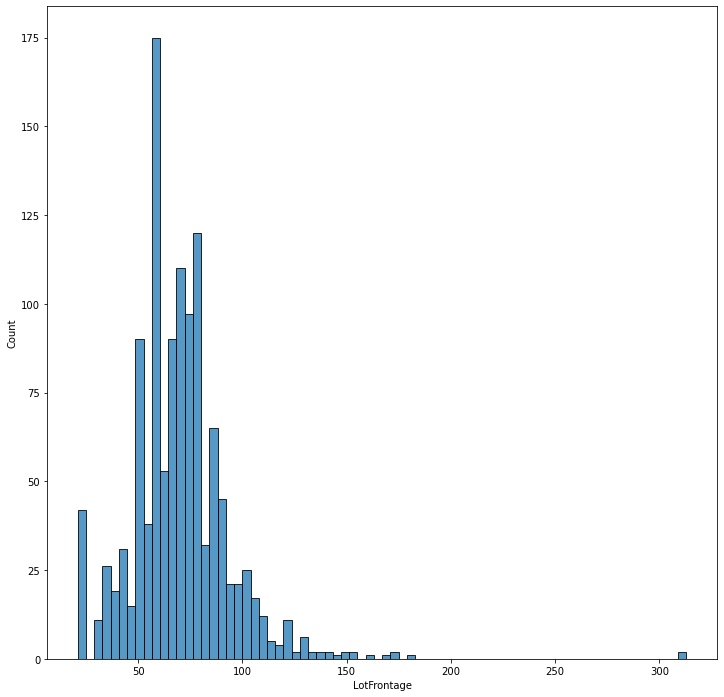

In [40]:
ax=plt.figure(figsize=(12,12))
ax=sns.histplot(df_train['LotFrontage'])

In [41]:
df_train[df_train['LotFrontage']>200]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
935,20,RL,313.0,27650,Pave,None,IR2,HLS,AllPub,Inside,...,0,None,None,None,0,11,2008,WD,Normal,242000
1299,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,...,480,Gd,None,None,0,1,2008,New,Partial,160000


In [42]:
med_front=df_train['LotFrontage'].median()

In [43]:
df_train[['LotArea','LotFrontage']].sort_values('LotArea',ascending=True)

,LotArea,LotFrontage
Id,,
957,1300,24.0
1040,1477,21.0
615,1491,21.0
490,1526,21.0
1450,1533,21.0
...,...,...
452,70761,62.0
707,115149,NaN
250,159000,NaN


In [44]:
df_train['LotFrontage'].fillna(med_front,inplace=True)

In [45]:
df_train['LotFrontage'].isnull().sum()

0

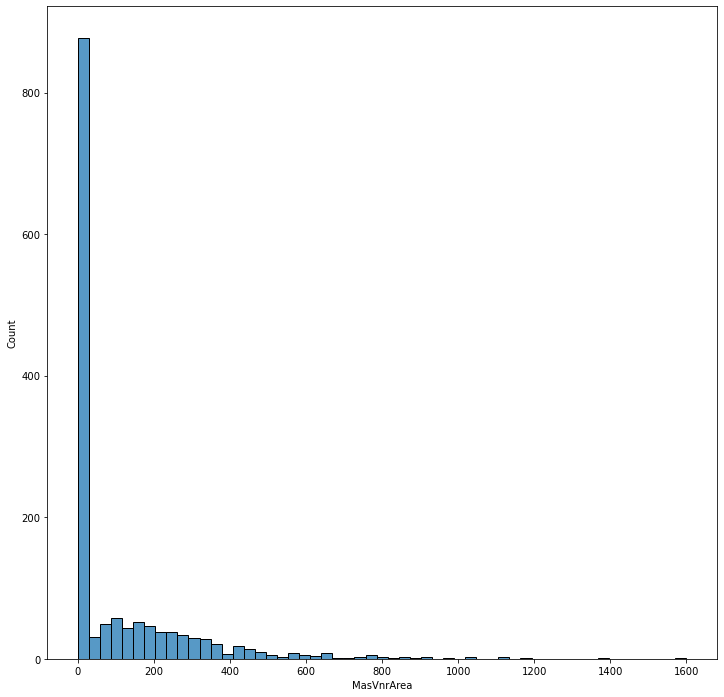

In [46]:
ax=plt.figure(figsize=(12,12))
ax=sns.histplot(df_train['MasVnrArea'])

In [47]:
print(df_train['MasVnrArea'].mean(), df_train['MasVnrArea'].median())

103.68526170798899 0.0


In [48]:
fal_Mas=df_train[df_train['MasVnrType']=='None']

In [49]:
fal_Mas[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
Id,,
2,None,0.0
4,None,0.0
6,None,0.0
9,None,0.0
10,None,0.0
...,...,...
1455,None,0.0
1456,None,0.0
1458,None,0.0


In [50]:
dif_val_Mas=list(fal_Mas['MasVnrArea'].unique())
dif_val_Mas

[0.0, nan, 288.0, 1.0, 344.0, 312.0]

aquí hay algo curioso, hay casas que tienen 'MasVnrArea' diferente de cero pero que 'MasVnrType' es 'None' por lo que hay una discrepancia, hay que lidiar con esas discrepancias, pero primero

In [51]:
df_train['MasVnrArea'].fillna(0,inplace=True)

In [52]:
dif_val_Mas[2:]

[288.0, 1.0, 344.0, 312.0]

In [53]:
df_filtered = df_train[df_train['MasVnrArea'].isin(dif_val_Mas[2:])][['MasVnrArea', 'MasVnrType']]

In [54]:
df_filtered

,MasVnrArea,MasVnrType
Id,,
66,344.0,BrkFace
136,288.0,BrkFace
219,312.0,BrkFace
398,288.0,BrkFace
625,288.0,None
774,1.0,None
1155,288.0,Stone
1231,1.0,None
1301,344.0,None


Como se puede observar hay valores que fueron llenados de manera incorrecta tanto en MasVnrArea y en MasVnrType

In [55]:
df_train.loc[df_train['MasVnrArea'].isin(dif_val_Mas[3:]), 'MasVnrArea'] = 0

# Ahora vamos con el test set

In [56]:
df_test[mis_col_test]

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1461,RH,80.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,1961.0,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD
1462,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,...,1958.0,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD
1463,RL,74.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,Gd,TA,...,1997.0,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD
1464,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,...,1998.0,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD
1465,RL,43.0,NaN,AllPub,HdBoard,HdBoard,None,0.0,Gd,TA,...,1992.0,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD
2916,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,1970.0,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD
2917,RL,160.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,1960.0,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD


In [57]:
def limpieza_test(df_test):
    df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0], inplace=True)
    df_test['Alley'].fillna('None',inplace=True)

SyntaxError: unexpected EOF while parsing (<ipython-input-57-9a83575473c6>, line 2)

In [58]:
df_test['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [62]:
df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0], inplace=True)

In [64]:
df_test['Alley'].fillna('None',inplace=True)

In [66]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [67]:
df_test['Utilities'].fillna('None',inplace=True)

In [70]:
df_test[['Exterior1st','Exterior2nd']]

,Exterior1st,Exterior2nd
Id,,
1461,VinylSd,VinylSd
1462,Wd Sdng,Wd Sdng
1463,VinylSd,VinylSd
1464,VinylSd,VinylSd
1465,HdBoard,HdBoard
...,...,...
2915,CemntBd,CmentBd
2916,CemntBd,CmentBd
2917,VinylSd,VinylSd


In [85]:
df_test['Exterior1st'].isnull().sum()

1

In [86]:
df_test['Exterior2nd'].isnull().sum()

1

In [83]:
df_test[df_test['Exterior1st'].isnull()][['Exterior1st','Exterior2nd']]

,Exterior1st,Exterior2nd
Id,,
2152,NaN,NaN


In [84]:
df_test[df_test['Exterior2nd'].isnull()][['Exterior1st','Exterior2nd']]

,Exterior1st,Exterior2nd
Id,,
2152,NaN,NaN


In [ ]:
corr_matrix=df_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix)
plt.show()

In [ ]:
#Un monotn de features sin correlación importante
corr_matrix['SalePrice']

In [ ]:
high_corr_SP=corr_matrix['SalePrice'][abs(corr_matrix['SalePrice'].values)>0.5].sort_values(ascending=False)
high_corr_SP

In [ ]:
high_corr = df_train[high_corr_SP.index].corr()
plt.figure(figsize=(8,8))
sns.heatmap(high_corr,annot=True)

In [ ]:
sns.displot(x=df_train['SalePrice'],kind="hist",kde = True)